# Rust
A continuación se va a analizar la viabilidad de utilizar la tecnología **rust** que puede tener las siguientes ventajas:

- Misma eficiencia que con `C++`.
- Seguridad en el uso de memoria.
- Integración práctica con Python.

## Primeros pasos con `rust`
Para empezar se empezó [instalando](https://www.rust-lang.org/tools/install) `rust` de una forma muy sencilla a través de `curl` y posteriormente se siguió el [hola mundo](https://www.rust-lang.org/learn/get-started) que la documentación proveé el cual contiene lo siguiente:

```rs
fn main() {
    println!("Hello World!");
}
```

El cual pudo ser ejecutado después haber inicializado el proyecto con `cargo new <nombre_proyecto>` y luego corriéndolo con `cargo run`.

## Integración con Python
**PyO3** son integraciones de `Rust` con `Python` para poder crear, correr e interactuar con código `Python` desde binarios en `Rust` [[1](https://pyo3.rs/v0.22.2/)].

Un ejemplo básico es a través de la librería `maturin` que se puede instalar a través de `pip` y permite construir y publicar paquetes `Python` basados en `Rust` con una mínma configuración a través de un archivo `Cargo.toml`

```toml
[package]
name = "stmeasures"
version = "0.1.0"
edition = "2021"

[lib]
name = "stmeasures"
# "cdylib" is necessary to produce a shared library for Python to import from.
#
# Downstream Rust code (including code in `bin/`, `examples/`, and `tests/`) will not be able
# to `use string_sum;` unless the "rlib" or "lib" crate type is also included, e.g.:
# crate-type = ["cdylib", "rlib"]
crate-type = ["cdylib"]

[dependencies.pyo3]
version = "0.22.2"
features = ["extension-module"]
```

y el archivo `src/lib.rs`:
```rs
use pyo3::prelude::*;

/// Formats the sum of two numbers as string.
#[pyfunction]
fn sum_as_string(a: usize, b: usize) -> PyResult<String> {
    Ok((a + b).to_string())
}

/// A Python module implemented in Rust.
#[pymodule]
fn stmeasures(m: &Bound<'_, PyModule>) -> PyResult<()> {
    m.add_function(wrap_pyfunction!(sum_as_string, m)?)?;

    Ok(())
}
```

Y después de ejecutar en terminal `maturin develop`, es posible utilizar esta librería recién creada.

In [1]:
import stmeasures

stmeasures.sum_as_string(20, 12)

'32'

## Distancia euclideana con `Rust`

Se agrega la siguiente función a nuestra librería para poder calcular la distancia euclideana entre 2 arreglos:

```rs
#[pyfunction]
fn distance(p: Vec<f64>, q: Vec<f64>) -> PyResult<f64> {
    if p.len() != q.len() {
        return Err(PyErr::new::<pyo3::exceptions::PyValueError, _>(
            "Error: Arrays must always have the same size."
        ));
    }

    let squares_sum = p.iter()
        .zip(q.iter())
        .map(|(a, b)| (a - b).powi(2))
        .sum::<f64>();

    Ok(squares_sum.sqrt())
}
```

Sin olvidar agregar `m.add_function(wrap_pyfunction!(distance, m)?)?;` a nuestro módulo, y con esto ya es posible utilizar esta función de distancia euclideana.

In [2]:
stmeasures.distance([1, 2], [3, 4])

2.8284271247461903

### Tiempos de ejecución
Se utiliza la utilería que se implementó para poder tanto generar trayectorias como graficar los tiempos de ejecución que `stmeasures.distance` tiene para poder compararlos tanto con [Python, Python/C++](euclidean.ipynb#Análisis-con-vectores-de-tamaño-1000), [C++](euclidean.ipynb#Análisis-solo-en-C++) y [PySpark](pyspark.ipynb#Gráficas-de-la-distancia-euclideana-con-PySpark).

Primeramente se empieza importando nuestra utilería.

In [3]:
import sys
import os.path

parent_dir = os.path.join(os.path.abspath(''), os.path.pardir)
sys.path.append(os.path.abspath(parent_dir))

#### Análisis con valores esperables de tamaños de coordenadas reales
Los tamaños con los que se trabajarán tienen en promedio un tamaño de 60 pares de coordenadas, por lo que para este primer análisis se incrementará de 30 en 30.

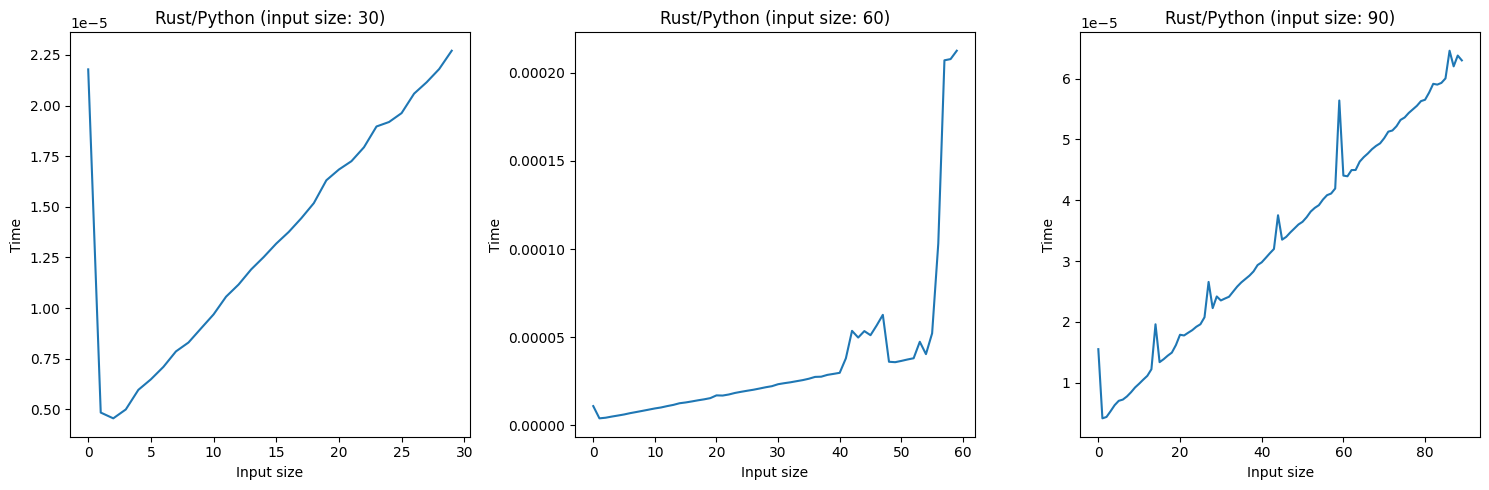

In [5]:
f = stmeasures.distance    # Function to analyze
p = genjson._create_coords # Function that generates trajectories
t = "Rust/Python"          # Plot title
s = 30                     # Increment step in subplots
m = 30                     # Base value for increment
plotfn.time_complexity3(f, p, t, s, m)

#### Análisis incrementando por 1000
Se toma como referencia lo que se hizo con PySpark y que también sirve para comparar Python y C++

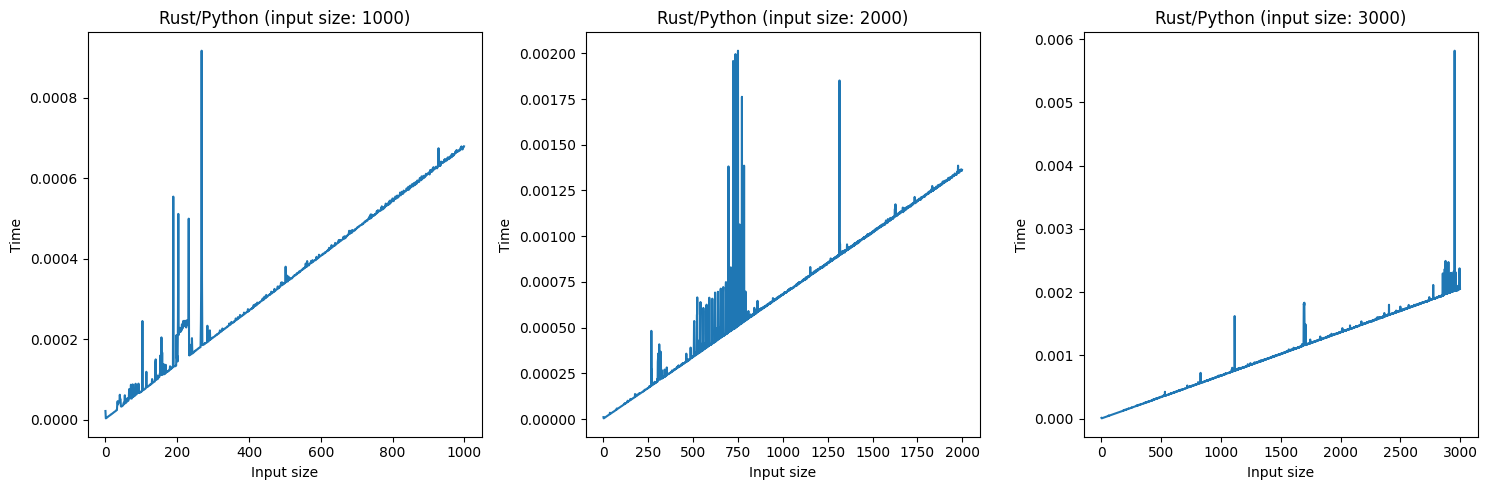

In [6]:
f = stmeasures.distance    # Function to analyze
p = genjson._create_coords # Function that generates trajectories
t = "Rust/Python"          # Plot title
s = 1000                   # Increment step in subplots
m = 1000                   # Base value for increment
plotfn.time_complexity3(f, p, t, s, m)

#### Análisis incrementando por 2000

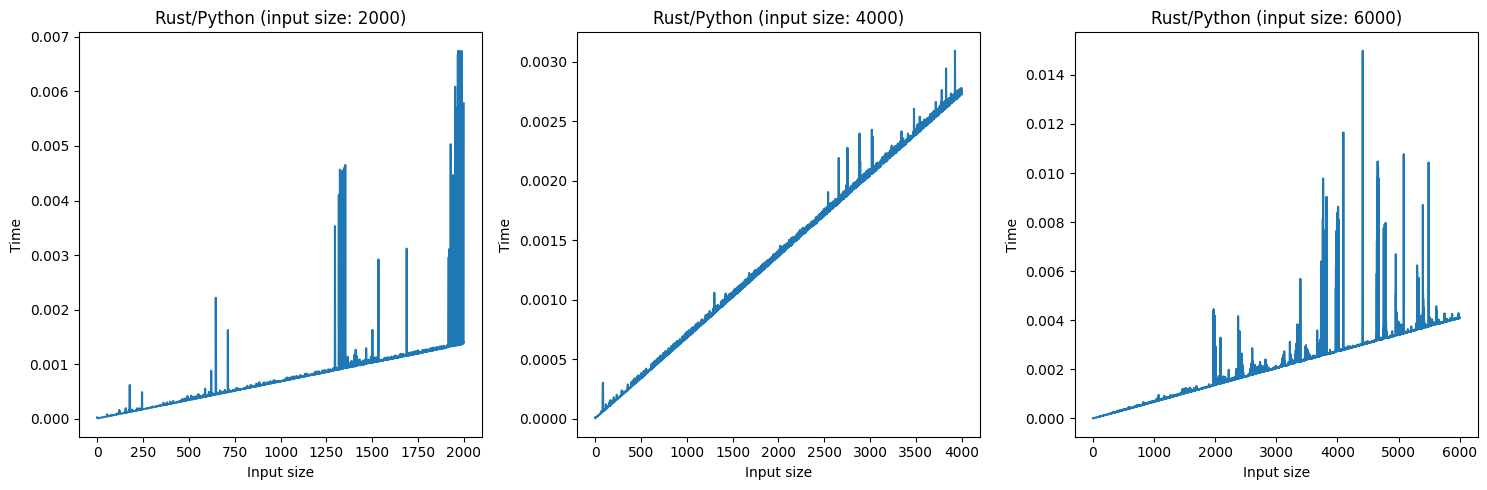

In [7]:
f = stmeasures.distance    # Function to analyze
p = genjson._create_coords # Function that generates trajectories
t = "Rust/Python"          # Plot title
s = 2000                   # Increment step in subplots
m = 2000                   # Base value for increment
plotfn.time_complexity3(f, p, t, s, m)

#### Análisis incrementando por 3000

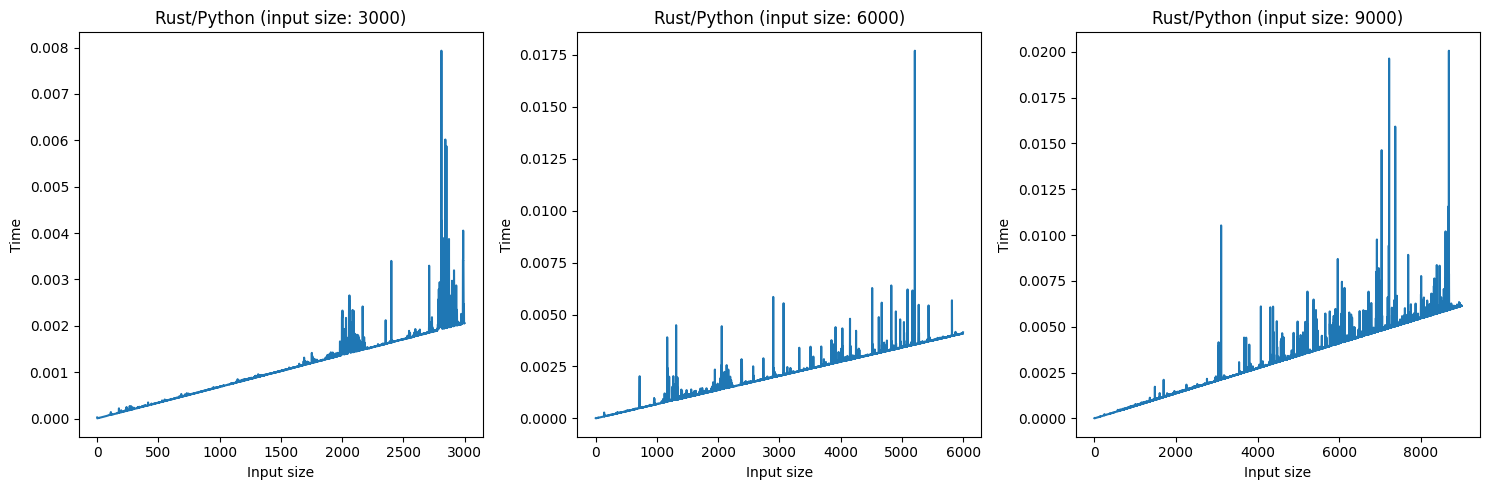

In [8]:
f = stmeasures.distance    # Function to analyze
p = genjson._create_coords # Function that generates trajectories
t = "Rust/Python"          # Plot title
s = 3000                   # Increment step in subplots
m = 3000                   # Base value for increment
plotfn.time_complexity3(f, p, t, s, m)